<a href="https://colab.research.google.com/github/ankitbatra22/Gesture-Recognizer/blob/develop/gesture_detect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/ankitbatra22/Gesture-Recognizer.git
%cd Gesture-Recognizer/
!git checkout develop

fatal: destination path 'Gesture-Recognizer' already exists and is not an empty directory.
/content/Gesture-Recognizer
M	configs/config.json
M	model.py
M	preprocessing.py
Already on 'develop'
Your branch is up to date with 'origin/develop'.


In [2]:
import torch
import torch.nn as nn
from preprocessing import VideoFolder
import json
from torchvision.transforms import *
import cv2
from PIL import Image as im
from matplotlib import pyplot as plt
import torch.optim as optim
import os
import tqdm
import numpy as np
from torch.optim.lr_scheduler import ReduceLROnPlateau

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
!unzip '/content/drive/MyDrive/20bn-jester-v1-sub.zip'

Archive:  /content/drive/MyDrive/20bn-jester-v1-sub.zip
replace __MACOSX/._20bn-jester-v1-sub? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [5]:
import json
import os

with open("./configs/config.json") as dataFile:
  config = json.load(dataFile)

save_dir = os.path.join(config["output_dir"], config["model_name"])

transform = Compose([
        CenterCrop(100),
        #Resize(size=(300,300)),
        ToTensor()
        #Normalize(mean=[0.485, 0.456, 0.406],
                  #std=[0.229, 0.224, 0.225])
    ])

In [6]:
train_data = VideoFolder(root=config['train_data_folder'],
                             csv_file_input=config['train_data_csv'],
                             csv_file_labels=config['labels_csv'],
                             clip_size=config['clip_size'],
                             nclips=1,
                             step_size=config['step_size'],
                             is_val=False,
                             transform=transform,
                             )

train_loader = torch.utils.data.DataLoader(
        train_data,
        batch_size=config['batch_size'], shuffle=True,
        num_workers=config['num_workers'], pin_memory=True,
        drop_last=True)
  
val_data = VideoFolder(root=config['val_data_folder'],
                          csv_file_input=config['val_data_csv'],
                          csv_file_labels=config['labels_csv'],
                          clip_size=config['clip_size'],
                          nclips=1,
                          step_size=config['step_size'],
                          is_val=True,
                          transform=transform,
                          )

val_loader = torch.utils.data.DataLoader(
    val_data,
    batch_size=config['batch_size'], shuffle=False,
    num_workers=config['num_workers'], pin_memory=True,
    drop_last=False)

In [7]:
from model import Net

device = (torch.device('cuda') if torch.cuda.is_available()
else torch.device('cpu'))
print(torch.cuda.get_device_name(0))
print(torch.cuda.is_available())

net = Net()
print(net)
optimizer = torch.optim.SGD(net.parameters(), config['lr'],
                                momentum=config['momentum'],
                                weight_decay=config['weight_decay'])

criterion = nn.CrossEntropyLoss(reduction='sum')
EPOCHS = 20

Tesla P100-PCIE-16GB
True
Net(
  (conv1): Sequential(
    (0): Conv3d(3, 64, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
    (1): BatchNorm3d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ELU(alpha=1.0)
    (3): MaxPool3d(kernel_size=(1, 2, 2), stride=(1, 2, 2), padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv3d(64, 128, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
    (1): BatchNorm3d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ELU(alpha=1.0)
    (3): MaxPool3d(kernel_size=(1, 2, 2), stride=(1, 2, 2), padding=0, dilation=1, ceil_mode=False)
  )
  (conv3): Sequential(
    (0): Conv3d(128, 256, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
    (1): BatchNorm3d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ELU(alpha=1.0)
    (3): MaxPool3d(kernel_size=(2, 2, 2), stride=(2, 2, 2), padding=0, dilation=1, ceil_mode=Fals

211
tensor(3)


IndexError: ignored

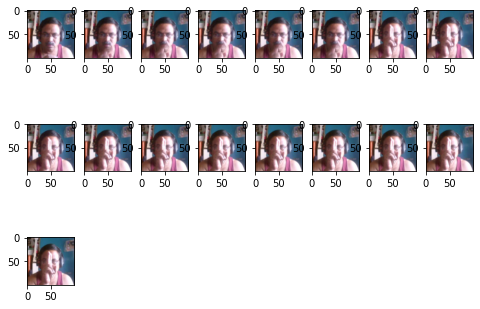

In [8]:
print(len(val_loader))
x = next(iter(val_loader))
#print(x)
#print(x[0].shape)

NUM = 15

print(x[1][NUM])
vidBatch = (x[0][NUM])
pog = vidBatch.permute(1,2,3,0)
pog[0]

import numpy as np
import matplotlib.pyplot as plt

w = 12
h = 12
fig = plt.figure(figsize=(8, 8))
columns = 8
rows = 4

for i in range(1, columns*rows):
    #img = np.random.randint(10, size=(h,w))
    img = pog[i].detach().numpy()
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)

plt.show()



  0%|          | 0/1639 [00:00<?, ?it/s]

EPOCH:  0


  0%|          | 0/1639 [00:00<?, ?it/s]


TRAIN LOSS:  1.4161742175039975 VALIDATION LOSS: 0.7990540894569379
VALIDATION ACCURACY 0.7505924170616114
EPOCH:  1


  0%|          | 0/1639 [00:00<?, ?it/s]


TRAIN LOSS:  0.831914783187797 VALIDATION LOSS: 0.7721334189459046
VALIDATION ACCURACY 0.768068720379147
EPOCH:  2


  0%|          | 0/1639 [00:00<?, ?it/s]


TRAIN LOSS:  0.6100118936285549 VALIDATION LOSS: 0.7088281593828405
VALIDATION ACCURACY 0.7817436808846762
EPOCH:  3


  0%|          | 0/1639 [00:00<?, ?it/s]


TRAIN LOSS:  0.527131560403465 VALIDATION LOSS: 0.5981617351702604
VALIDATION ACCURACY 0.7960974526066351
EPOCH:  4


  0%|          | 0/1639 [00:00<?, ?it/s]


TRAIN LOSS:  0.4979258684919894 VALIDATION LOSS: 0.6670481836096653
VALIDATION ACCURACY 0.8077310426540284
EPOCH:  5


  0%|          | 0/1639 [00:00<?, ?it/s]


TRAIN LOSS:  0.5462922917694862 VALIDATION LOSS: 0.9449889801477934
VALIDATION ACCURACY 0.8076125592417062
EPOCH:  6


  0%|          | 0/1639 [00:00<?, ?it/s]


TRAIN LOSS:  0.688499231448967 VALIDATION LOSS: 1.2254300121729973
VALIDATION ACCURACY 0.7991283006093433
EPOCH:  7


  0%|          | 0/1639 [00:00<?, ?it/s]


TRAIN LOSS:  0.9848326987733518 VALIDATION LOSS: 2.7847553737355635
VALIDATION ACCURACY 0.7759182464454977
EPOCH:  8


  0%|          | 0/1639 [00:00<?, ?it/s]


TRAIN LOSS:  1.1703832628383841 VALIDATION LOSS: 1.243110946851884
VALIDATION ACCURACY 0.7772676408636124
EPOCH:  9


  0%|          | 0/1639 [00:00<?, ?it/s]

Epoch    10: reducing learning rate of group 0 to 1.0000e-04.

TRAIN LOSS:  1.1385870836243315 VALIDATION LOSS: 1.5139049521130974
VALIDATION ACCURACY 0.7767031990521327
EPOCH:  10


  0%|          | 0/1639 [00:00<?, ?it/s]


TRAIN LOSS:  0.33557347091263734 VALIDATION LOSS: 0.6406376895746348
VALIDATION ACCURACY 0.7853430633347694
EPOCH:  11


  0%|          | 0/1639 [00:00<?, ?it/s]


TRAIN LOSS:  0.21197989029847336 VALIDATION LOSS: 0.6493123081552474
VALIDATION ACCURACY 0.7929996050552922
EPOCH:  12


  0%|          | 0/1639 [00:00<?, ?it/s]


TRAIN LOSS:  0.1710518399669216 VALIDATION LOSS: 0.6823933145375614
VALIDATION ACCURACY 0.7995351804593511
EPOCH:  13


  0%|          | 0/1639 [00:00<?, ?it/s]


TRAIN LOSS:  0.14579465052559457 VALIDATION LOSS: 0.693740755566771
VALIDATION ACCURACY 0.8053381008801624
EPOCH:  14


  0%|          | 0/1639 [00:00<?, ?it/s]


TRAIN LOSS:  0.12524526610739584 VALIDATION LOSS: 0.7292695532583795
VALIDATION ACCURACY 0.8101599526066351
EPOCH:  15


  0%|          | 0/1639 [00:00<?, ?it/s]

Epoch    16: reducing learning rate of group 0 to 1.0000e-05.

TRAIN LOSS:  0.10991323319628628 VALIDATION LOSS: 0.7586226999777329
VALIDATION ACCURACY 0.8145549466824644
EPOCH:  16


  0%|          | 0/1639 [00:00<?, ?it/s]


TRAIN LOSS:  0.08906127060782716 VALIDATION LOSS: 0.7663910150730991
VALIDATION ACCURACY 0.8184328826317256
EPOCH:  17


  0%|          | 0/1639 [00:00<?, ?it/s]


TRAIN LOSS:  0.08735063009579362 VALIDATION LOSS: 0.7807009635731508
VALIDATION ACCURACY 0.8218552527646129
EPOCH:  18


  0%|          | 0/1639 [00:00<?, ?it/s]


TRAIN LOSS:  0.084946590595141 VALIDATION LOSS: 0.7790887936402412
VALIDATION ACCURACY 0.8249563482165129
EPOCH:  19


100%|██████████| 1639/1639 [17:03<00:00,  1.60it/s]



TRAIN LOSS:  0.08403482811897013 VALIDATION LOSS: 0.7891066249954333
VALIDATION ACCURACY 0.8276954976303318


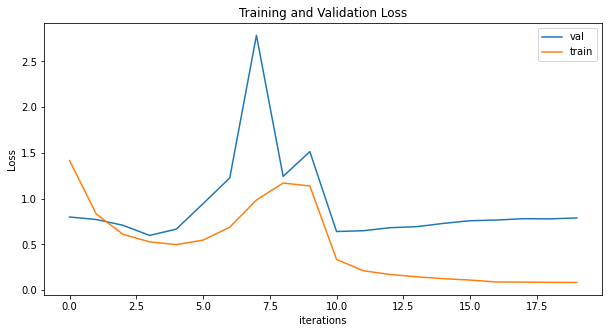

In [9]:
import matplotlib.pyplot as plt
from tqdm import tqdm

net.cuda()
torch.cuda.empty_cache()

val_losses = []
train_losses = []
min_valid_loss = 1e99
correct, total = 0, 0

scheduler = ReduceLROnPlateau(optimizer, 'min', patience=5, verbose=True)

for epoch in range(EPOCHS):
    train_loss = 0.0
    net.train()

    print("EPOCH: ", epoch)
    for i, (input, target) in enumerate(tqdm(train_loader)):
      #print(i)
      input, target = input.to(device = device), target.to(device = device)
      optimizer.zero_grad()
      output = net(input)
      loss = criterion(output, target)
      train_loss += loss.item()
      loss.backward()
      optimizer.step()

    net.eval()
    validation_loss = 0.0


    with torch.no_grad():
      for i, (item, truth) in enumerate(val_loader):
        item, truth = item.to(device = device), truth.to(device = device)
        out = net(item)
        #print(torch.argmax(out, dim=1), truth)
        # [predictions] and [truth]
        matching = torch.eq(torch.argmax(out, dim=1), truth)
        #print(torch.sum(matching, dim=0).item())
        # [boolean array]
        correct += torch.sum(matching, dim=0).item()
        total += 32
        valLoss = criterion(out, truth)
        validation_loss += valLoss.item()   

    #print(correct, total)
    accuracy = correct / total
    validation_loss /= (len(val_loader) * config["batch_size"]) #len val loader is the number of val batches
    train_loss /= (len(train_loader) * config["batch_size"])
    
    scheduler.step(validation_loss)

    if validation_loss < min_valid_loss:
      min_valid_loss = validation_loss
      torch.save(net.state_dict(), '/content/drive/MyDrive/july26.pt')
      print()
      print("model saved!")
      
    train_losses.append(train_loss)
    val_losses.append(validation_loss)

    print()
    print("TRAIN LOSS: ", train_loss, "VALIDATION LOSS:", validation_loss, )
    print("VALIDATION ACCURACY", accuracy)



plt.figure(figsize=(10,5))
plt.title("Training and Validation Loss")
plt.plot(val_losses,label="val")
plt.plot(train_losses,label="train")
plt.xlabel("iterations")
plt.ylabel("Loss")
plt.legend()
plt.show()



In [10]:
torch.save(net.state_dict(), '/content/drive/MyDrive/latest.pt')